## **1. Preliminary Data Analysis and Cleaning**

### Download, unzip and load the data folder 

In [1]:
# import libraries

# Libraries for data manipulation
import pandas as pd
import numpy as np

# Library for downloading zip file
import zipfile
import requests

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    classification_report
)

import joblib
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Download and unzip the data
zip_file = r"https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

filename = "white_wine.zip"  

try:
    response = requests.get(zip_file, stream=True)
    response.raise_for_status() 

    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"File '{filename}' downloaded successfully.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading file: {e}")

# After downloading, unzip the file
zipped_file = "white_wine.zip"
with zipfile.ZipFile(zipped_file, 'r') as zip_ref:
  zip_ref.printdir()

File 'wine_file.zip' downloaded successfully.
File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [3]:
with zipfile.ZipFile(zipped_file) as z:
  with z.open('winequality-white.csv') as white_wine:
    white_wine = pd.read_csv(white_wine, sep = ";")

### Display the first 6 rows and dataset shape

In [4]:
# Display the first 6 rows
white_wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [5]:
# Get the shape of the dataset
white_wine.shape

(4898, 12)

From the shape, it means we have:
- 4898 data samples/instances
- And 12 measurements/features

### Check for missing values and handle them appropriately

In [6]:
# Check for missing values
def check_for_missing_values(df):
  missing_values = df.isnull().sum()
  if missing_values.sum() > 0:
    m_vals = missing_values[missing_values > 0]
    print(f"Missing values present for, {m_vals} with {len(m_vals)} values missing")
  else:
    print("No missing values present")

check_for_missing_values(white_wine)


No missing values present


There are no missing values present in our dataset

### Check for duplicates and remove them if necessary

In [7]:
# Check for duplicates and handle them
def check_for_duplicates(df):
  dups = df.duplicated().sum()
  if dups > 0 == np.True_:
    print(f"There are {dups} duplicates in the dataset")
    df.drop_duplicates(inplace=True)
    print("Duplicates have been dropped successfully.")
  else:
    print("No duplicates present in our dataset.")
check_for_duplicates(white_wine)

No duplicates present in our dataset.


There are about 937 duplicates in our dataset and they have been dropped successfully

### Verify data types and correct them if needed

In [8]:
# Verify data types
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

From verifying the data types, all the datatypes are numerical and are used to measure the quality of the wine

### Provide a brief markdown summary of the data cleaning process

Data ingestion and cleaning process:
- Download and load the dataset from the url 
- Unzip the downloaded zipped file
- Display the first 6 rows of the data
- Check for missing values. There are no missing values in our wine dataset
- Check for duplicate values. There were 937 duplicates in our dataset and they have been handled successfully.


## **2. Exploratory Data Analysis and Scaling**

### Perform **univariate analysis** on all numerical features

In [9]:
# visualisation for univariate analysis using boxplot and histogram
def univariate_numerical_analysis(data, feature, figsize=(15, 20), kde=False, bins=10):
  """
  Boxplot and histogram combined

  data: dataframe
  feature: dataframe column
  figsize: size of figure (default (15,10))
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  """
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,  # Number of rows of the subplot grid= 2
      sharex=True,  # x-axis will be shared among all subplots
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize=figsize,
  )  # creating the 2 subplots
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
  )  # boxplot will be created and a triangle will indicate the mean value of the column
  sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
  ) if bins else sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2
  )  # For histogram
  ax_hist2.axvline(
      data[feature].mean(), color="green", linestyle="--"
  )  # Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(), color="black", linestyle="-"
  )  # Add median to the histogram


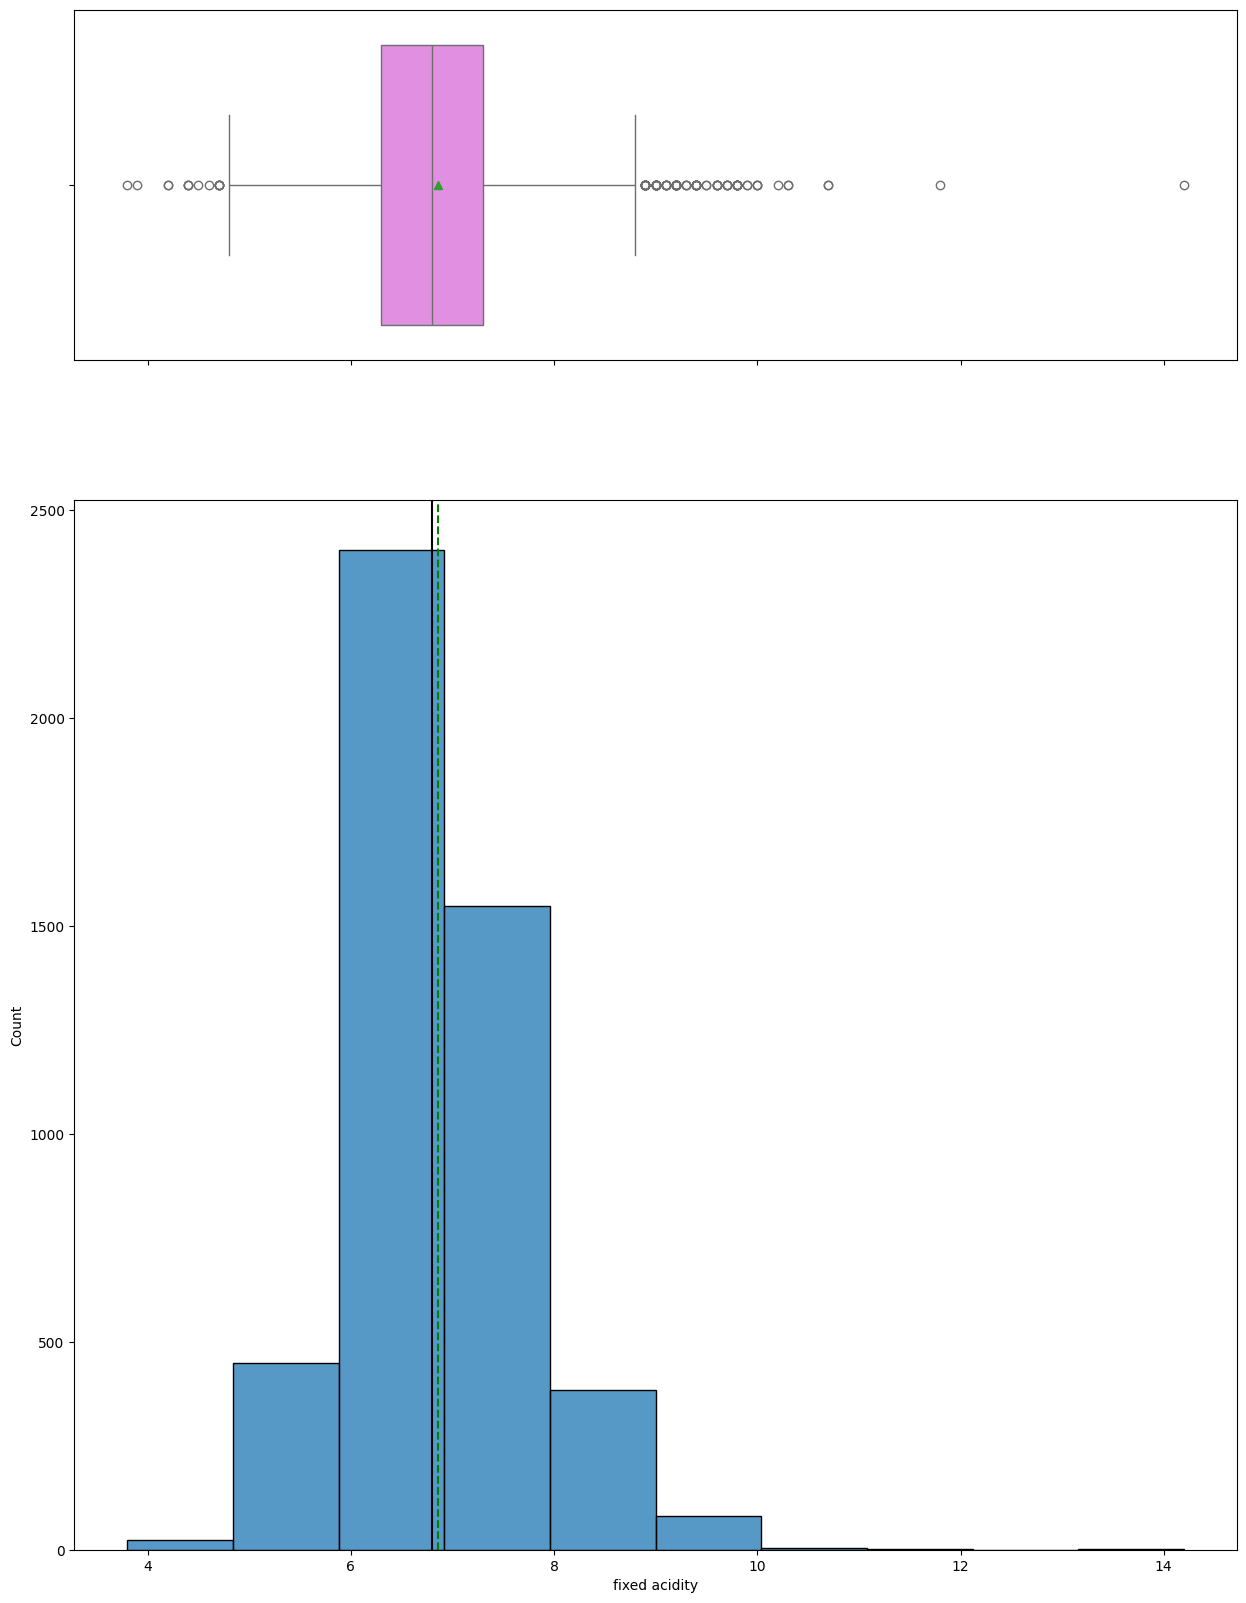

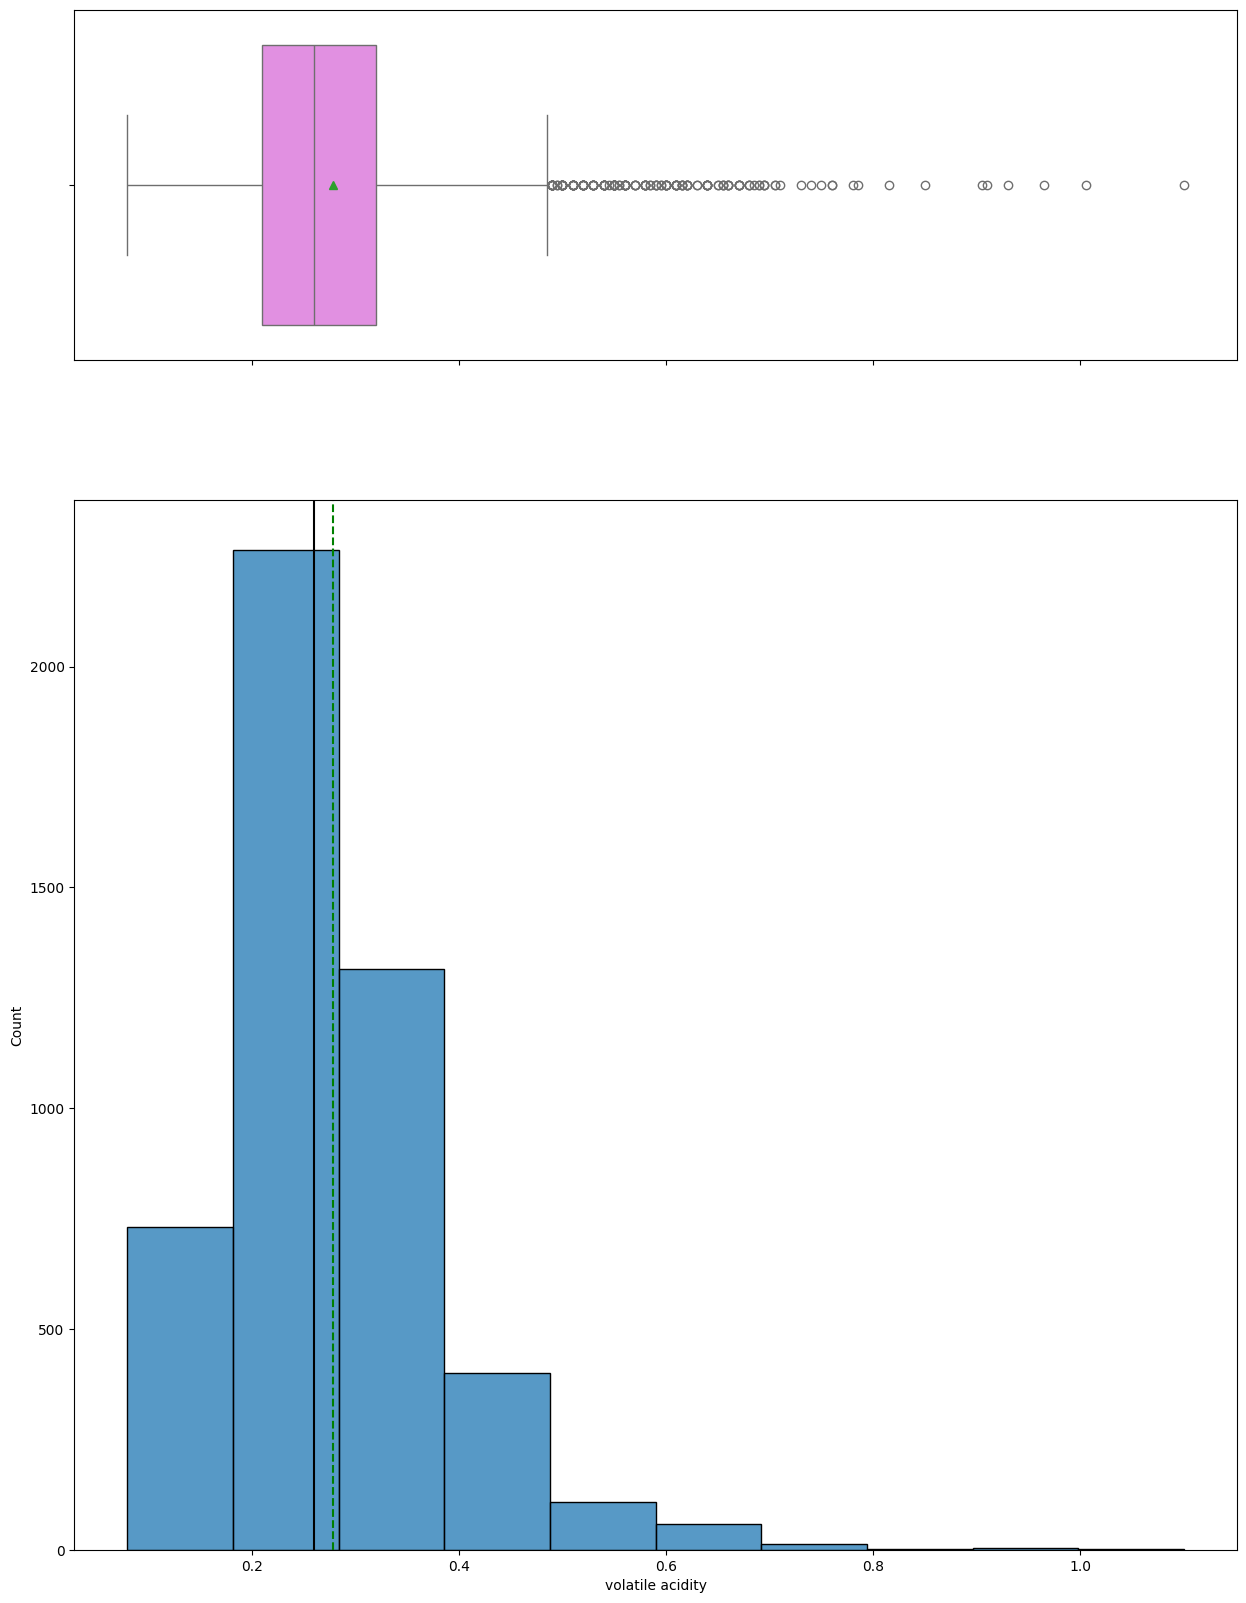

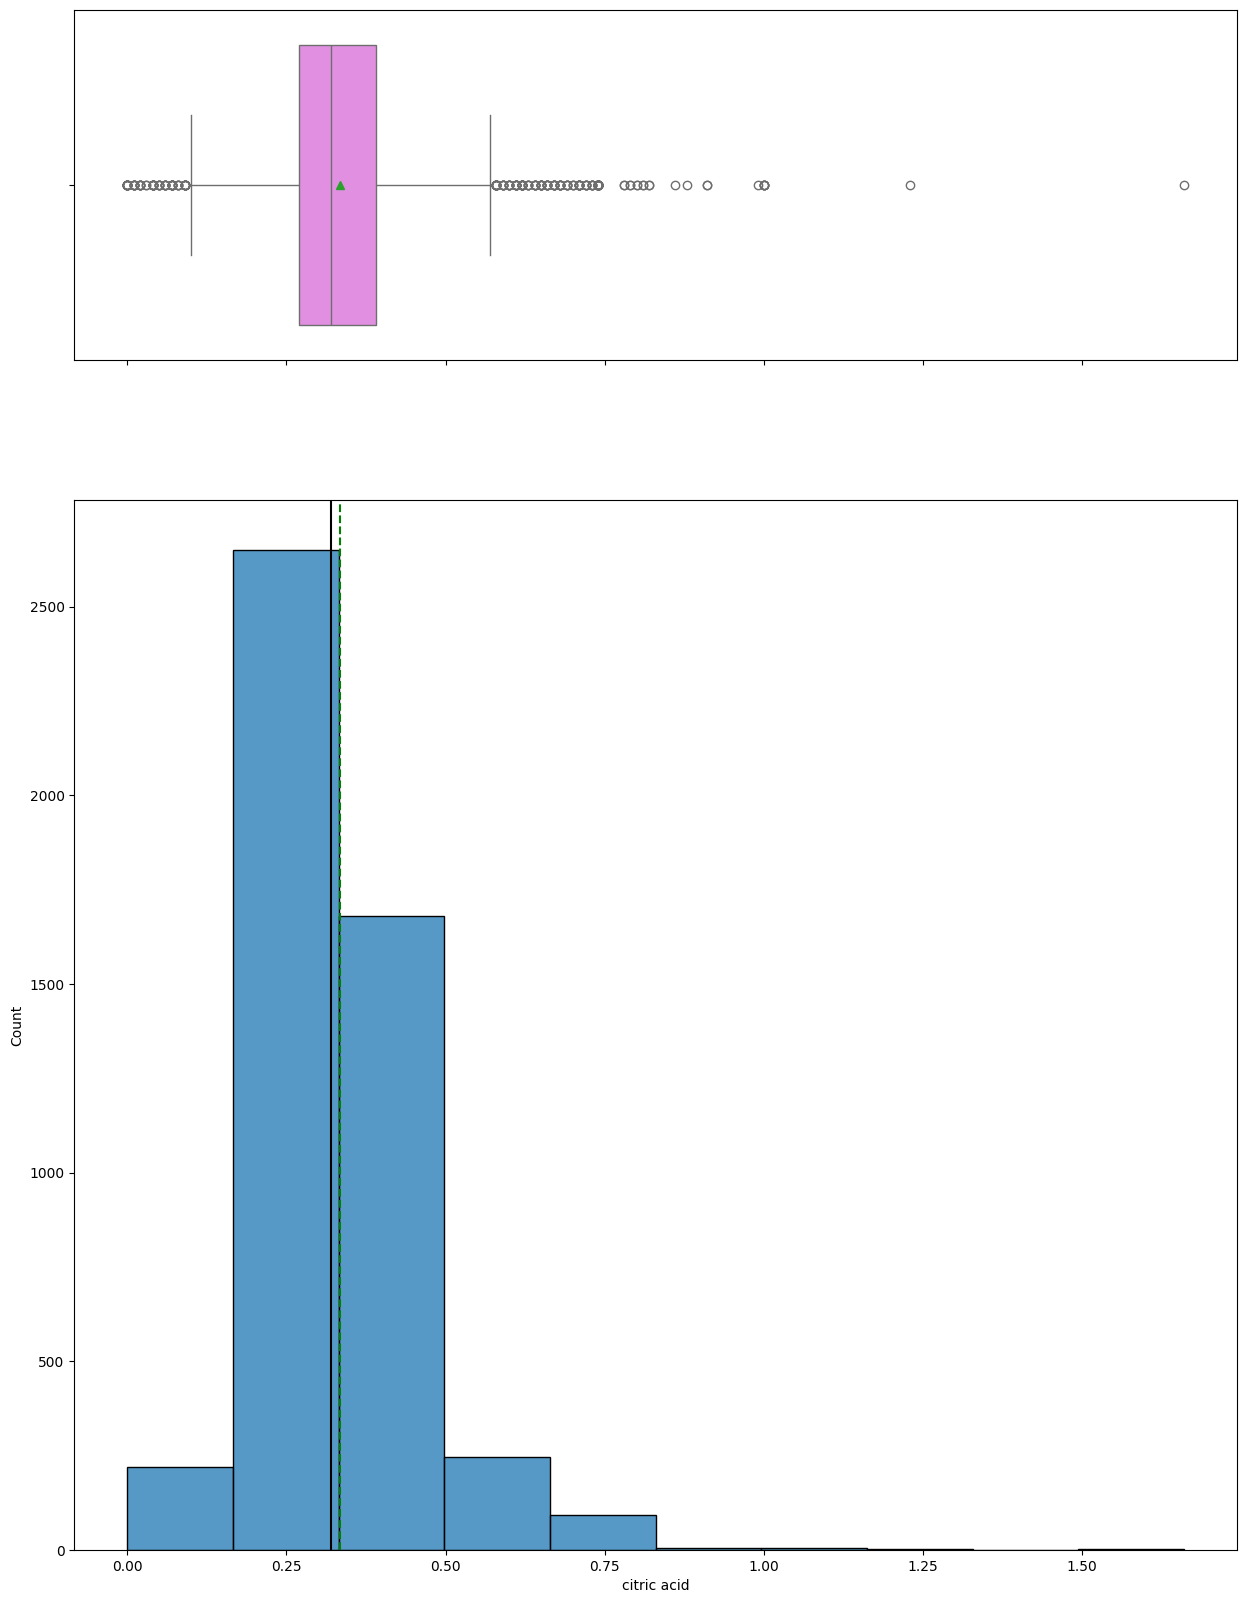

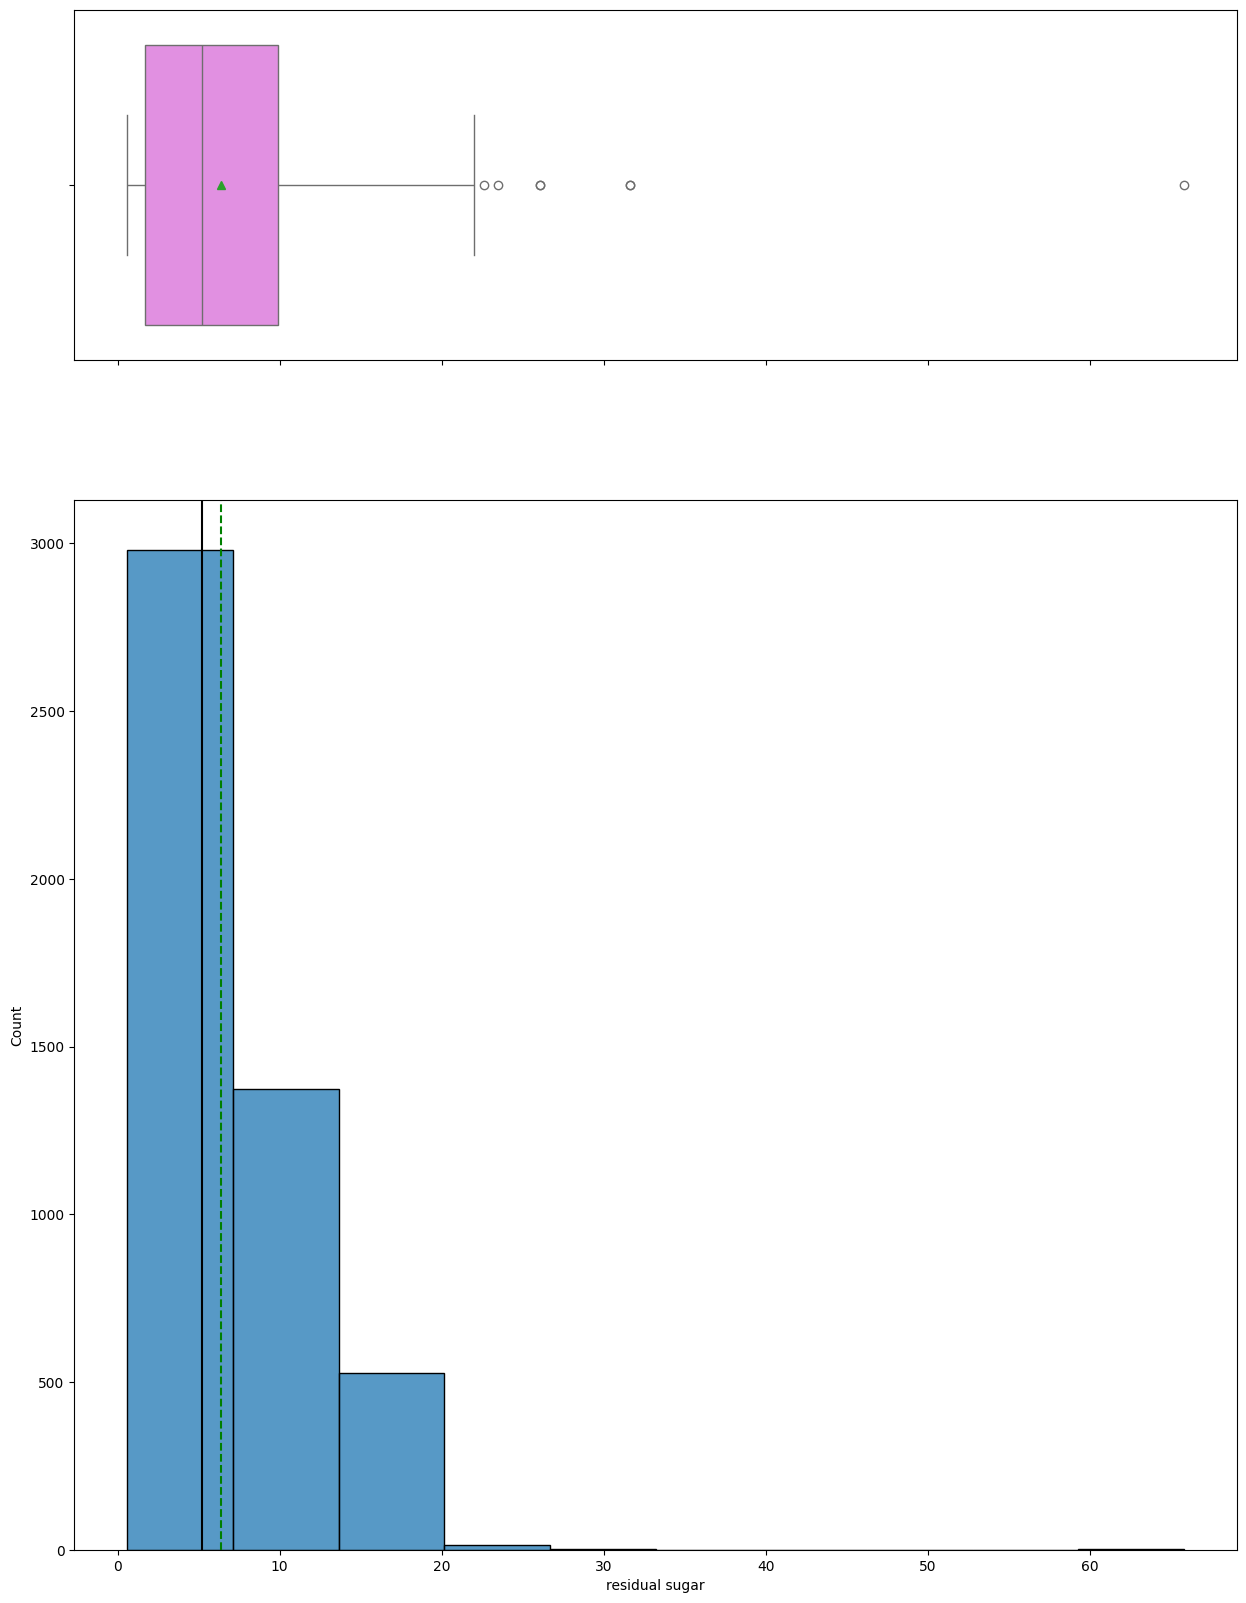

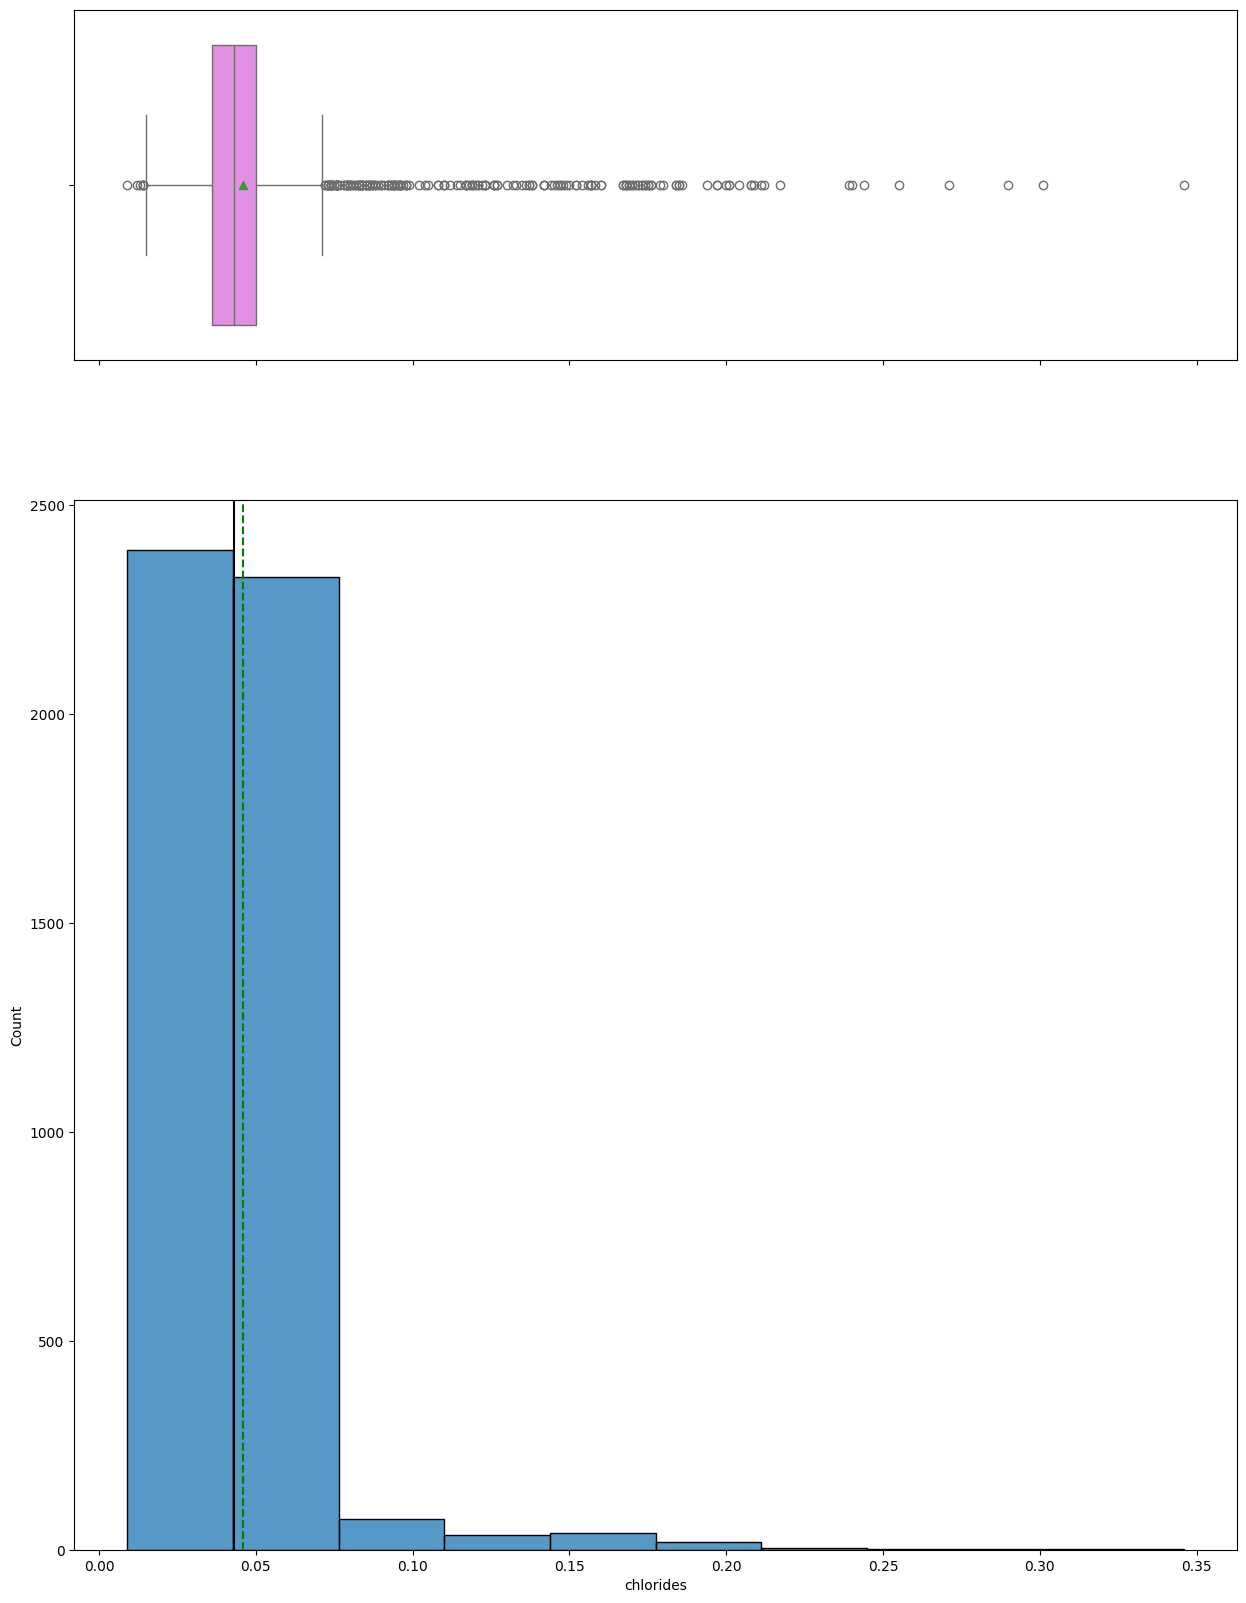

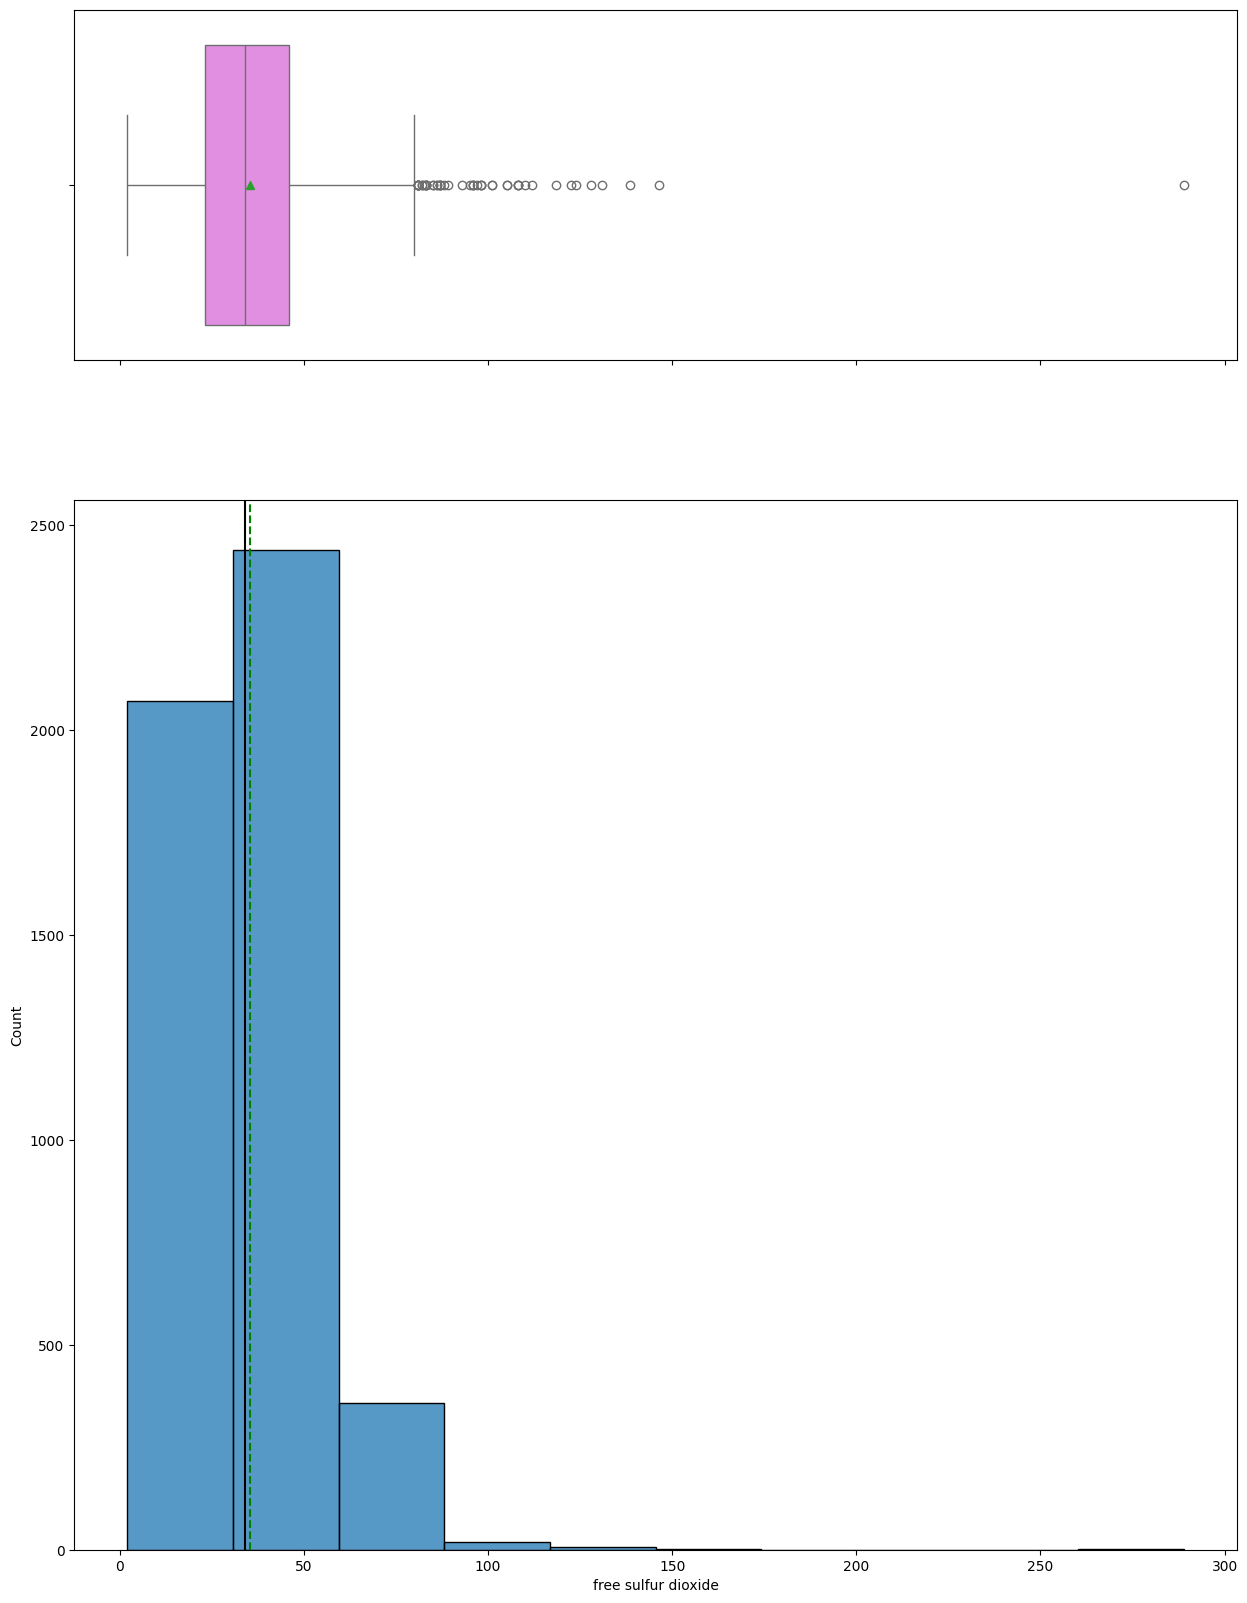

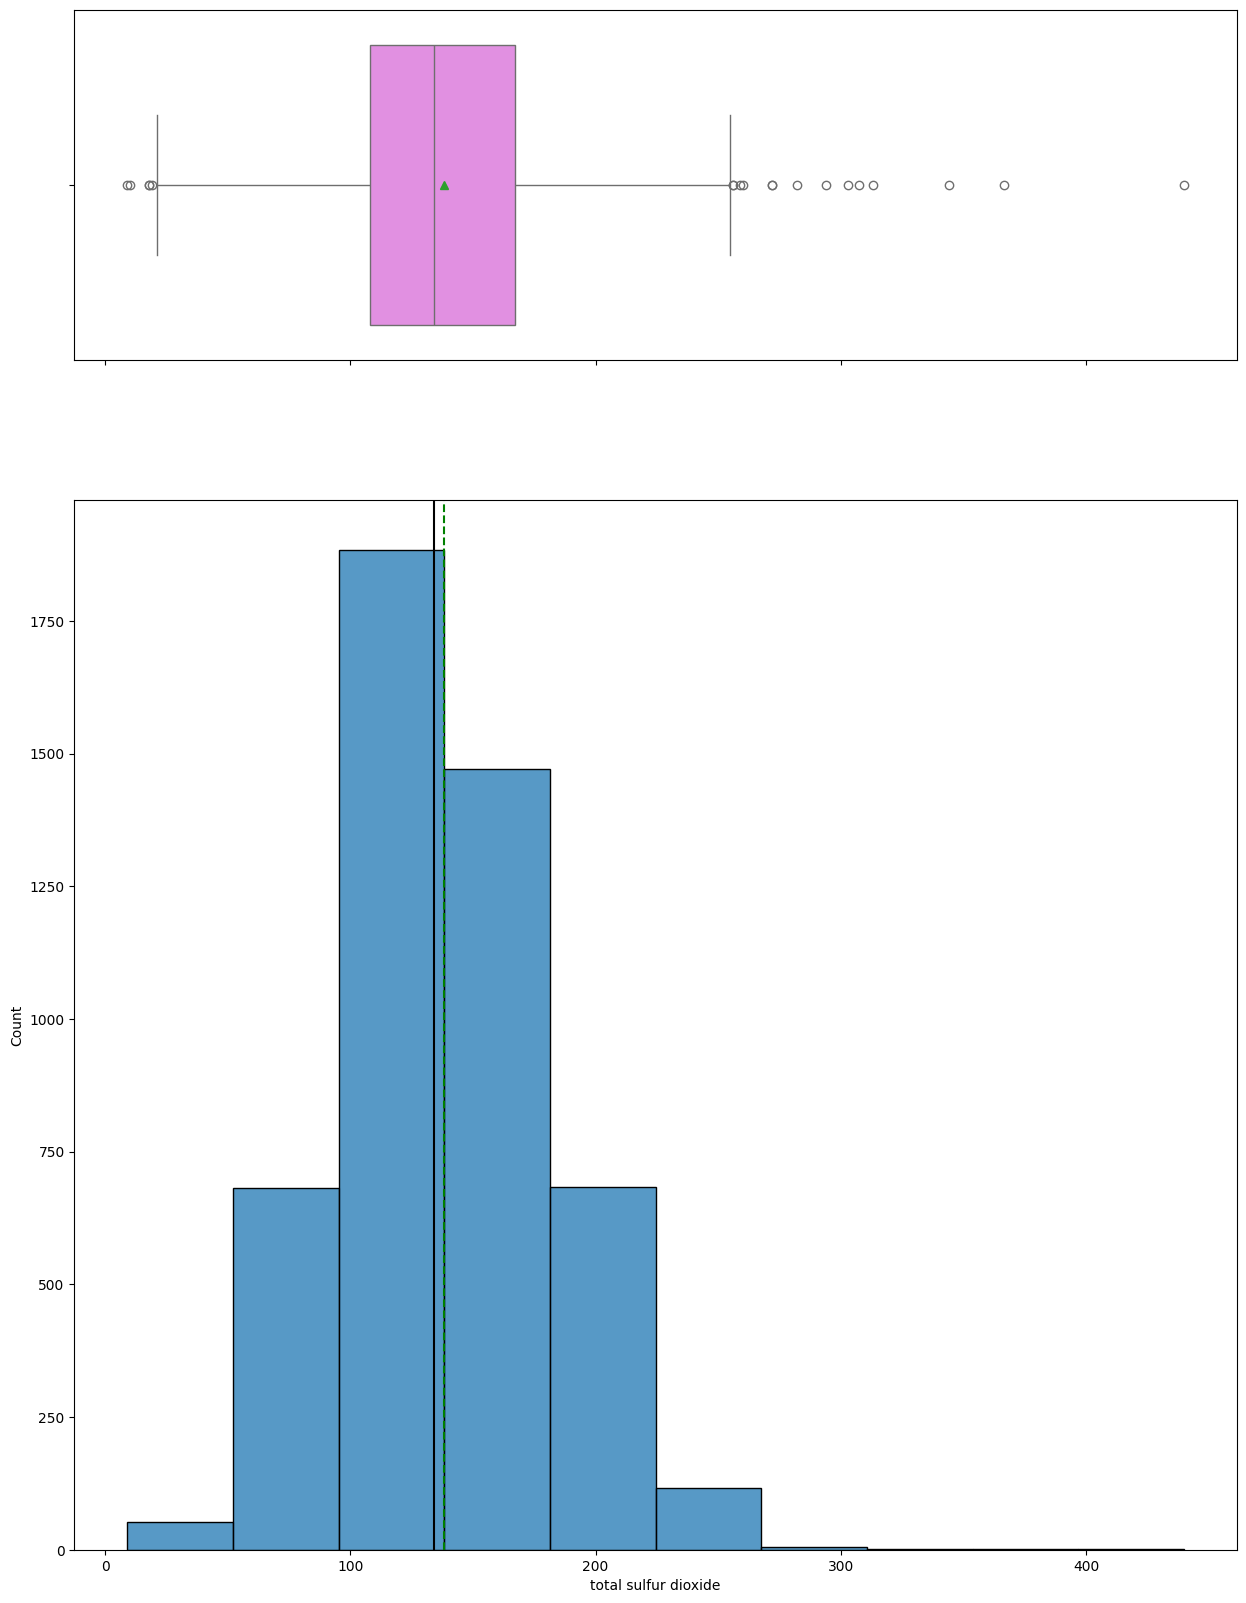

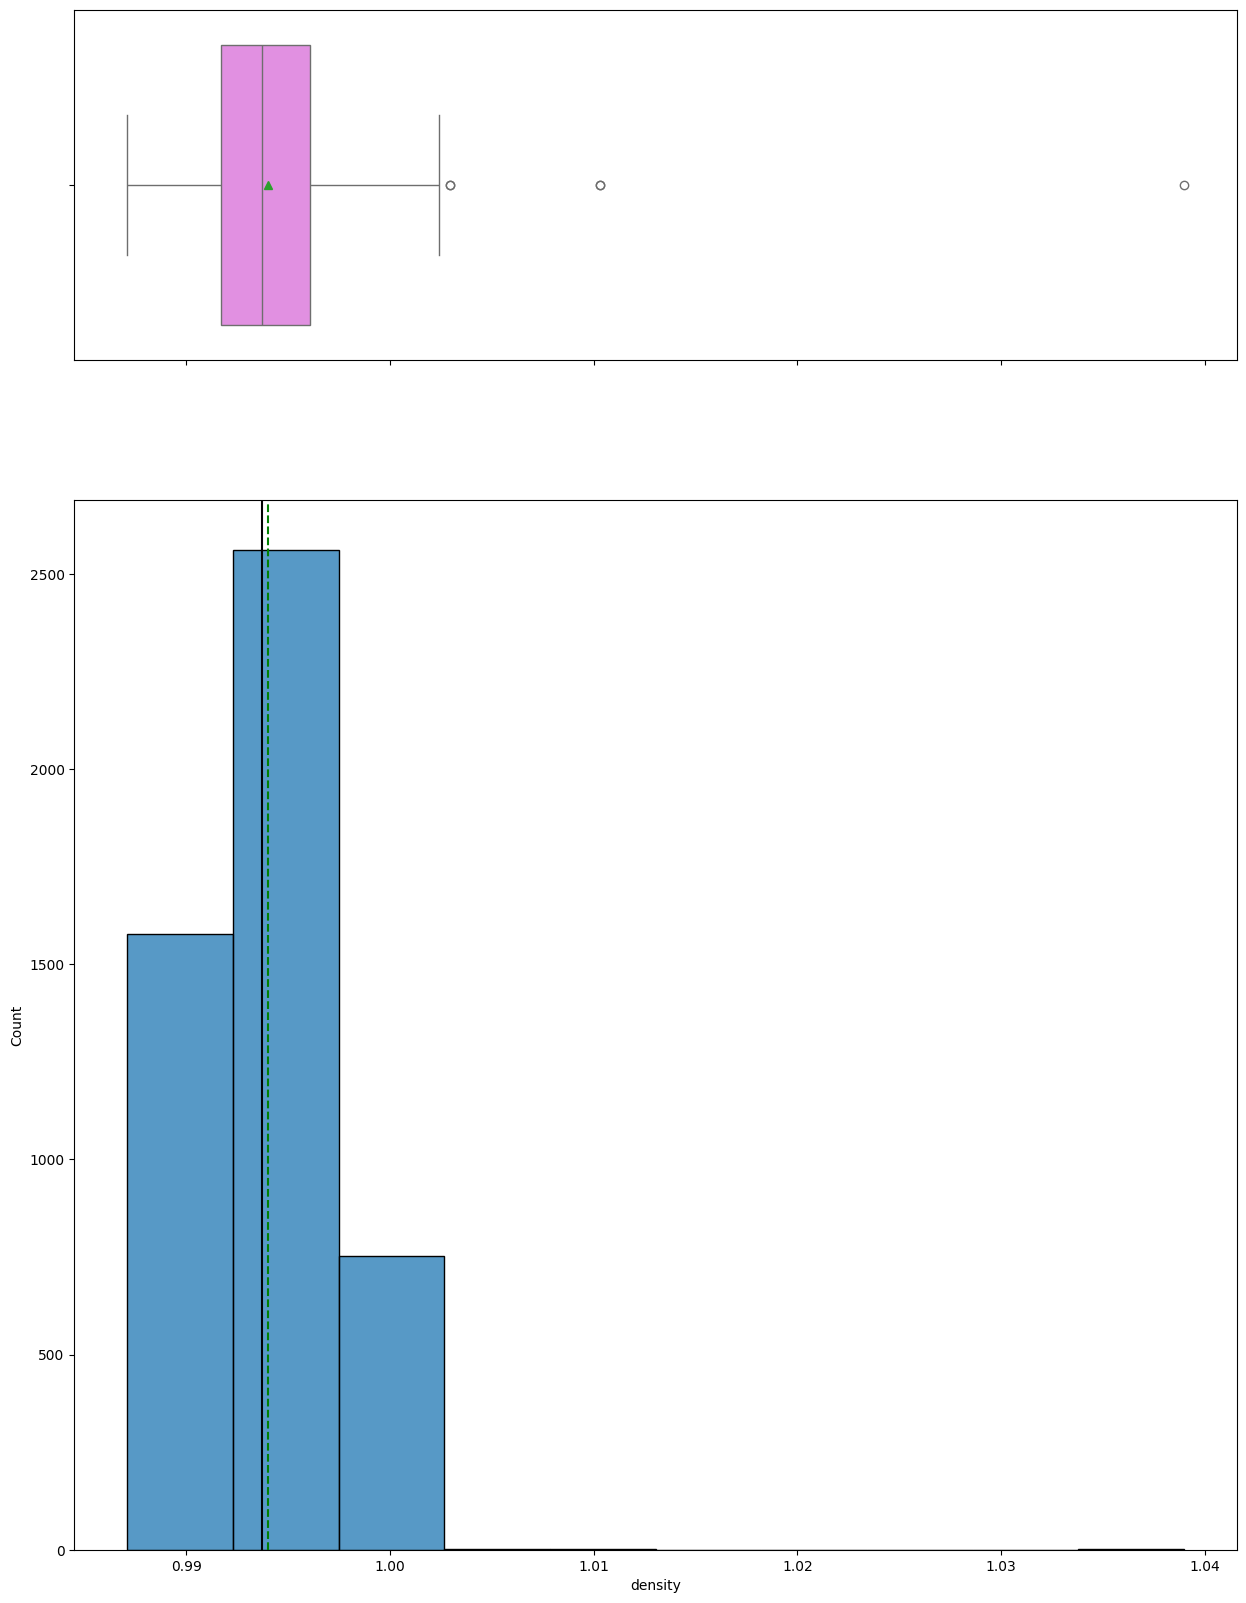

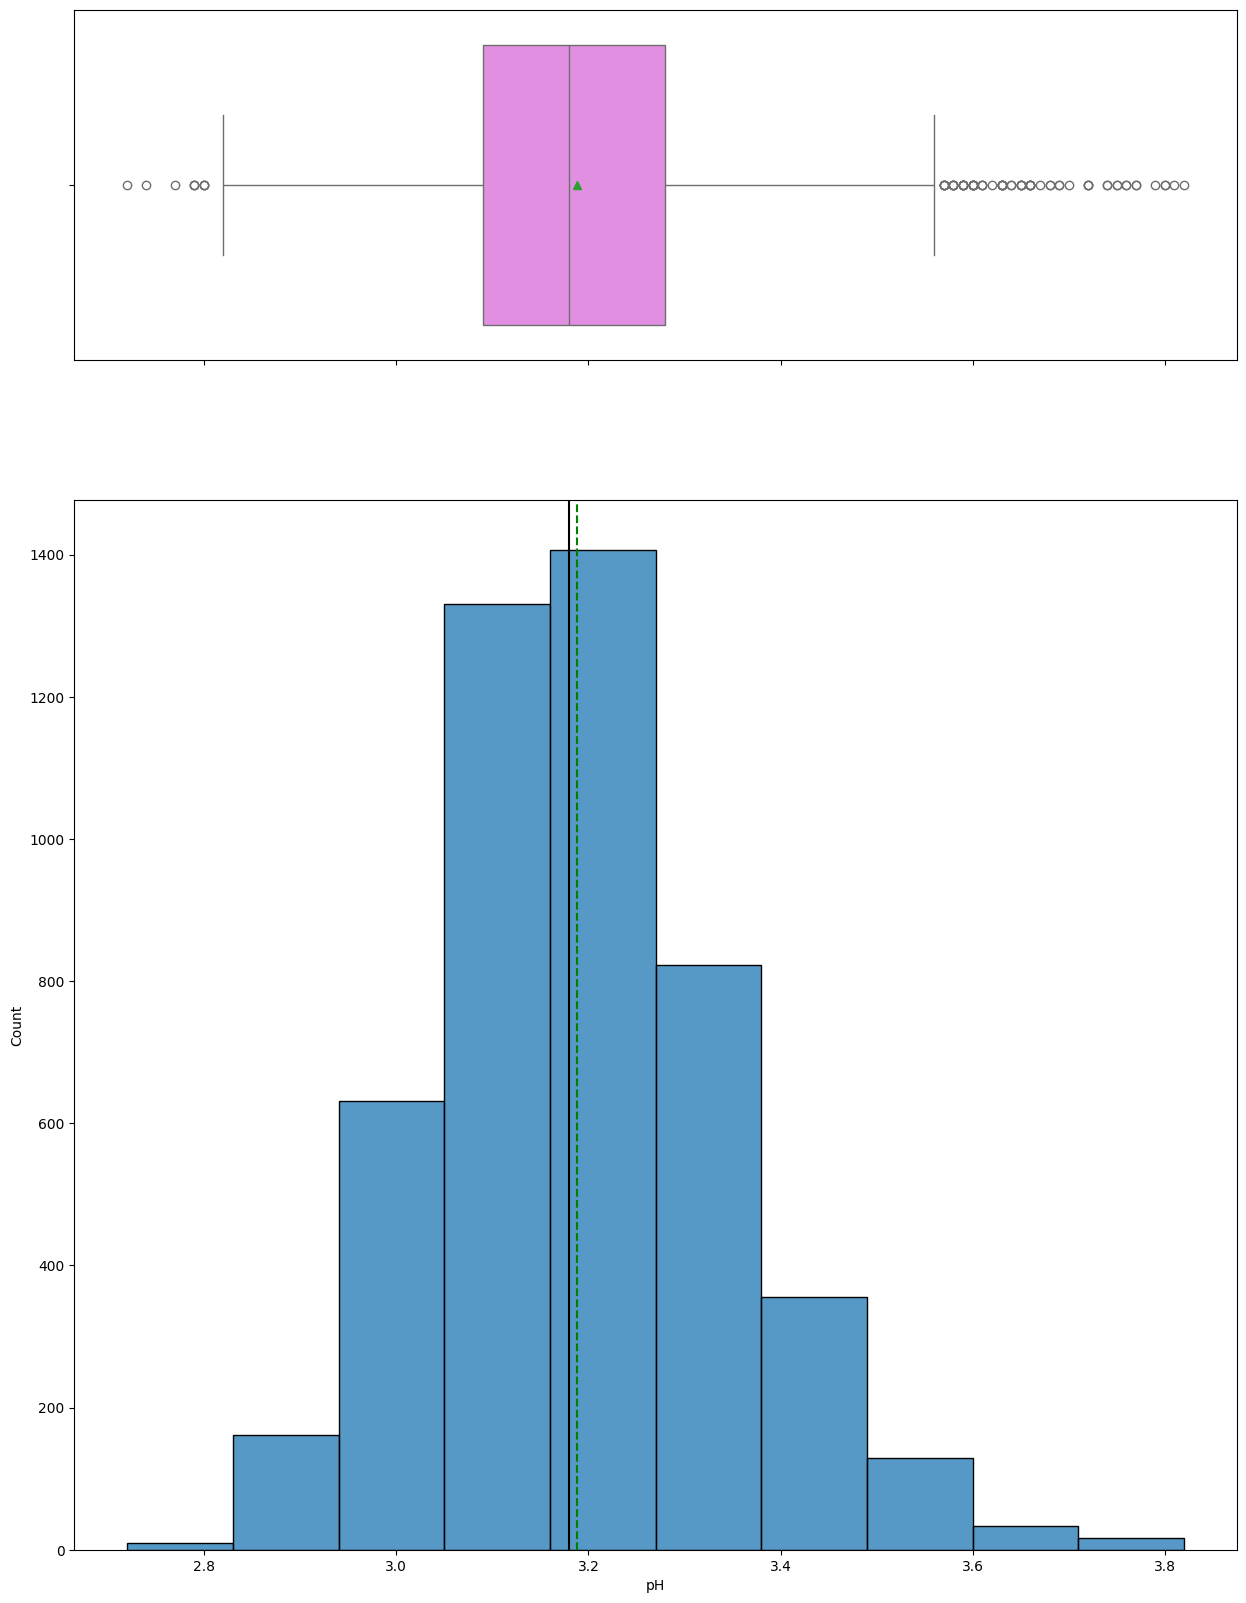

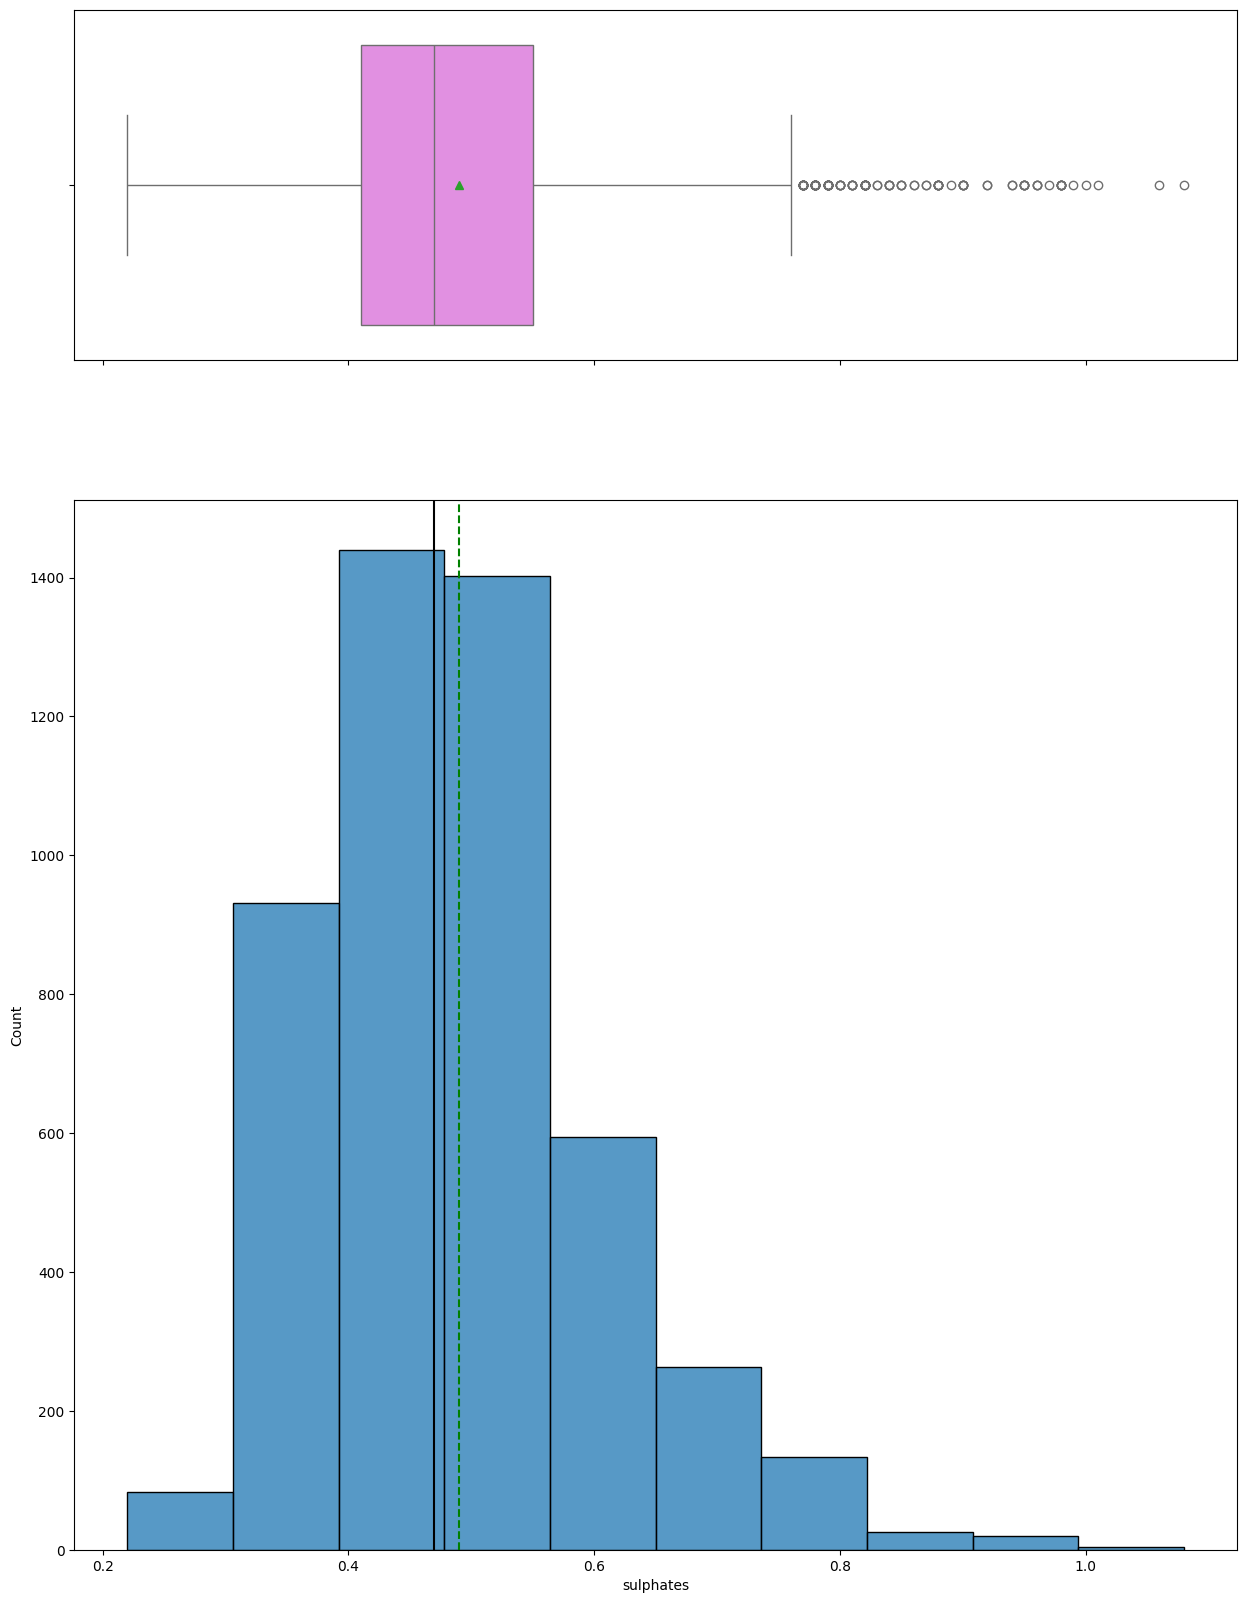

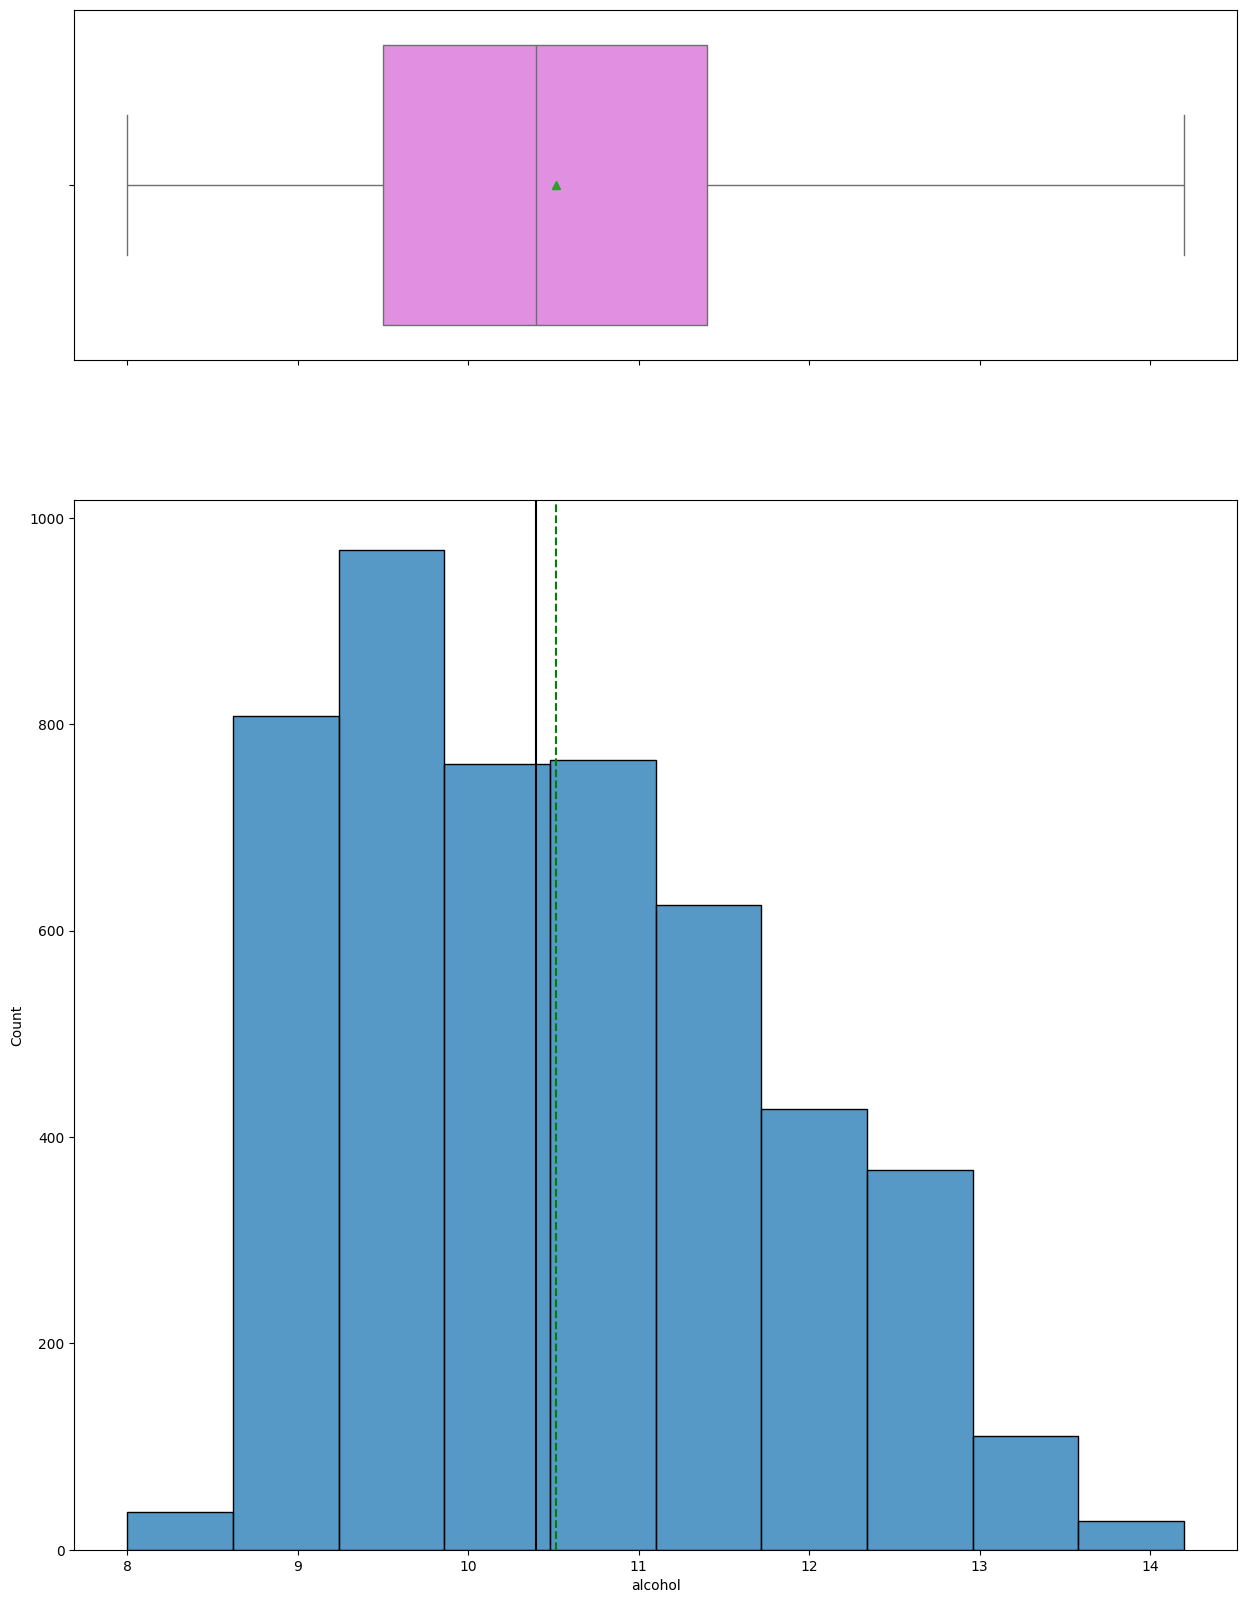

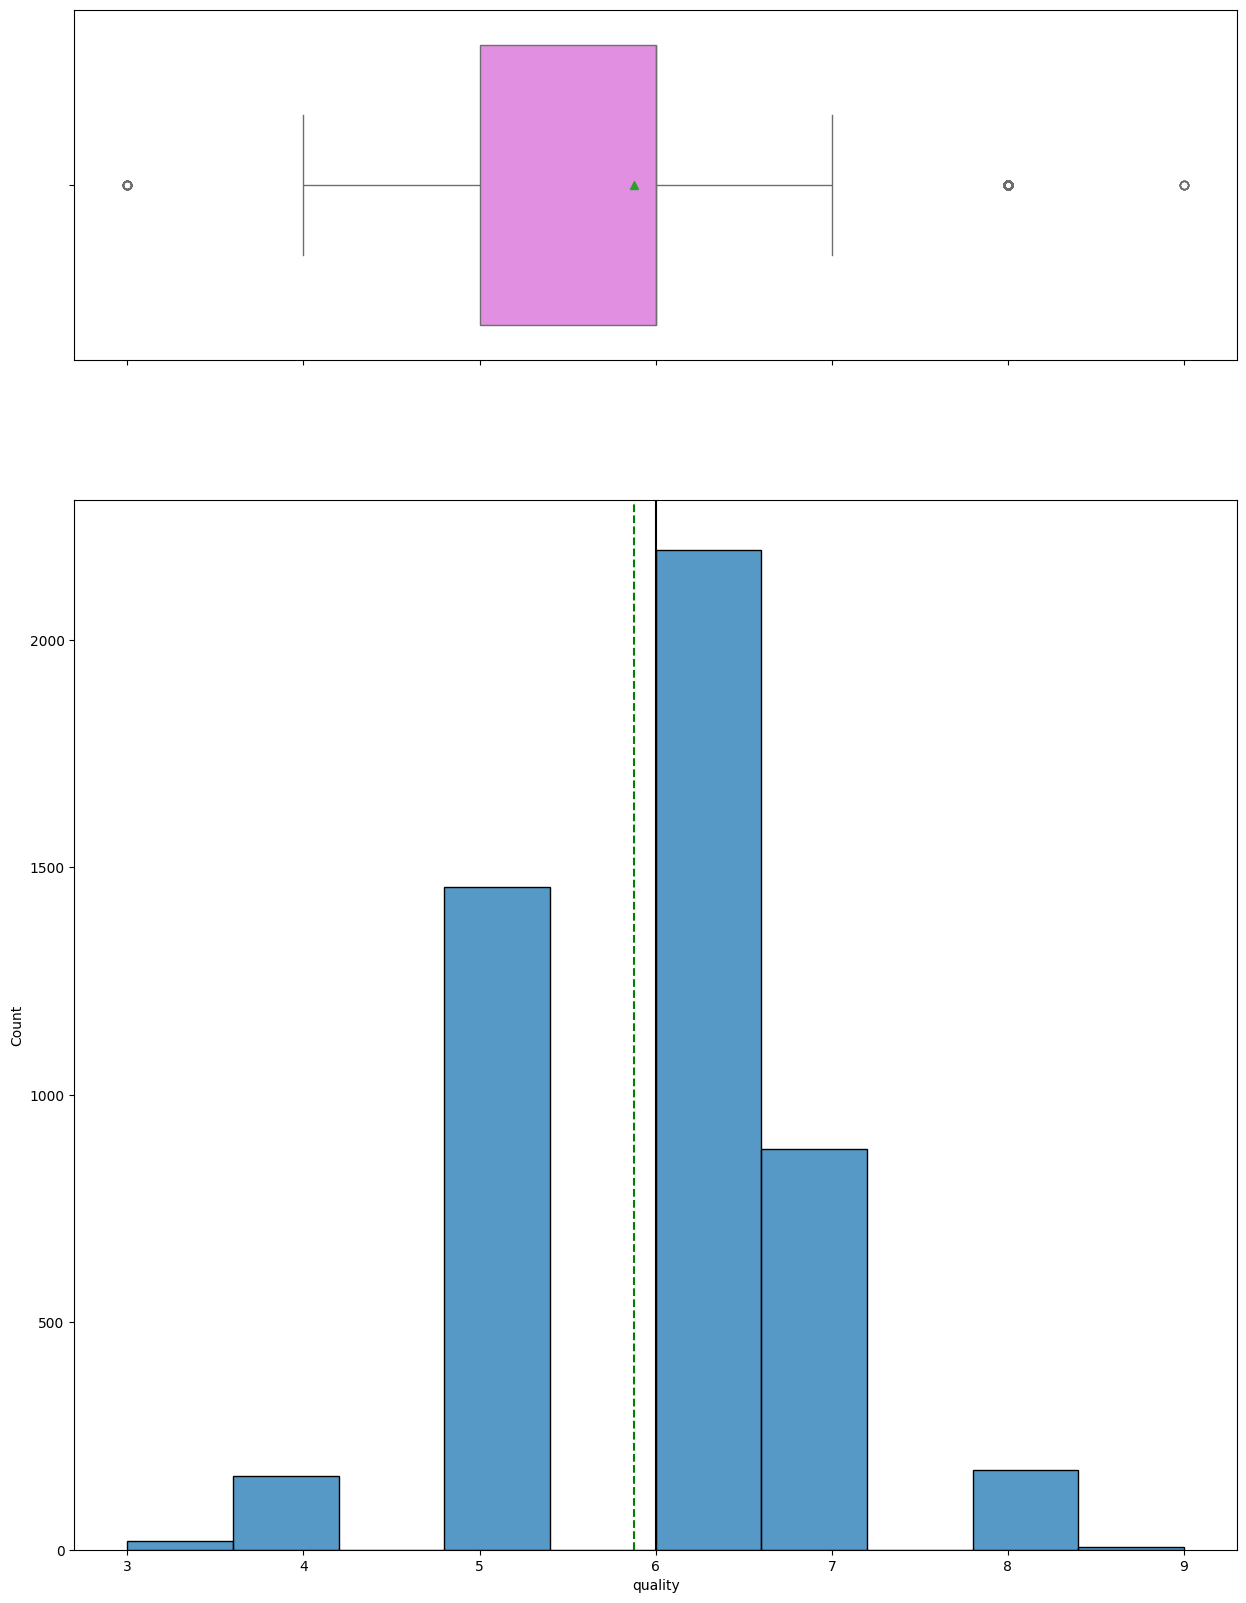

In [10]:
for col in white_wine.columns:
  univariate_numerical_analysis(white_wine, col)

### Examine the correlation of each feature with the target variable (quality).

In [11]:
# Correlation with target

def correlation_with_target(df, target_col, figsize=(10,2)):
  """
  Plots a heatmap showing correlation of each numeric feature against target_col.
  Returns a Series of correlations (sorted by absolute magnitude).
  """
  # compute correlations of every numeric column with the target
  corrs = df.corrwith(df[target_col]).drop(target_col)

  corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

  plt.figure(figsize=figsize)
  sns.heatmap(
      corrs_df,
      annot=True,
      fmt=".3f",
      cmap="coolwarm",
      center=0,
      vmin=-1,
      vmax=1,
      cbar_kws={'orientation': 'vertical', 'shrink':0.7}
  )
  plt.xticks(rotation=45, ha='right')
  plt.yticks([0], [target_col], rotation=0)
  plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
  plt.tight_layout()
  plt.show()

  # return sorted correlations for downstream use
  return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

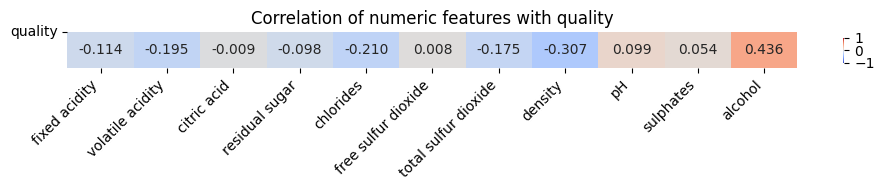

alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
dtype: float64


In [12]:
corr_series = correlation_with_target(white_wine, 'quality')
print(corr_series)

From the visualization, we can see that features like alcohol, chlorides and volatile acidity have strong correlation/influence on the quality of wine (which is the target/outcome)

### Map the quality column with categorical classes

In [13]:
# Categorize the target column 
white_wine = white_wine.replace({'quality': {3: "Bad", 4: "Bad", 5: "Average", 6: "Good", 7: "Good", 8: "Best", 9: "Best"}})

In [14]:
# Ensure this mapped categorical target is used for all subsequent modeling steps
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good


### Split the data into features X and target y

In [15]:
# split the data into X and y (target)
X = white_wine.drop('quality', axis=1)
y = white_wine['quality']


### Apply appropriate scaling to all numerical features

In [16]:
# Scale using MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

## **3. Build a Base Classification Model**

### Split the data into training and testing sets 

In [17]:
# Split the data with 80% train size and 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=234)


In [18]:
# Train the model using Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Run the prediction
y_pred = model.predict(X_test)

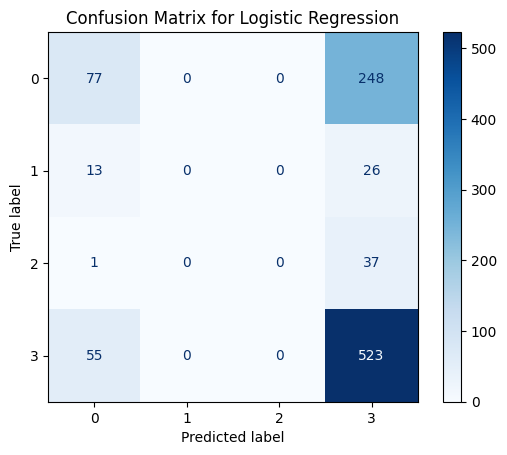

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix for Logistic Regression")
plt.show()


### Evaluate the model using Accuracy, Precision, Recall, f1-Score and Confusion Matrix

In [20]:
# Classification report for the best model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division = 1))


Classification Report:
              precision    recall  f1-score   support

     Average       0.53      0.24      0.33       325
         Bad       1.00      0.00      0.00        39
        Best       1.00      0.00      0.00        38
        Good       0.63      0.90      0.74       578

    accuracy                           0.61       980
   macro avg       0.79      0.29      0.27       980
weighted avg       0.62      0.61      0.55       980



**Classification Report**

- The model has a 61% accuracy. This means the overall accuracy of the prediction is 61% and it has a 61% chance of overall accuracy in prediction
- We have four classes
  *Average* 
  - The Average class used about 325 samples (support) to test
  - It has a 53% chance of predicting correctly and has high


## **4. Build and Compare Multiple Models**

### Train at least three different classification models

In [21]:
models = {
  "RandomForest": RandomForestClassifier(),
  "Decision Tree": DecisionTreeClassifier(),
  "K-Nearest Neighbors": KNeighborsClassifier(),
  "Naive Bayes": GaussianNB()
}

Trailing RandomForest...
RandomForest Accuracy: 0.7653061224489796


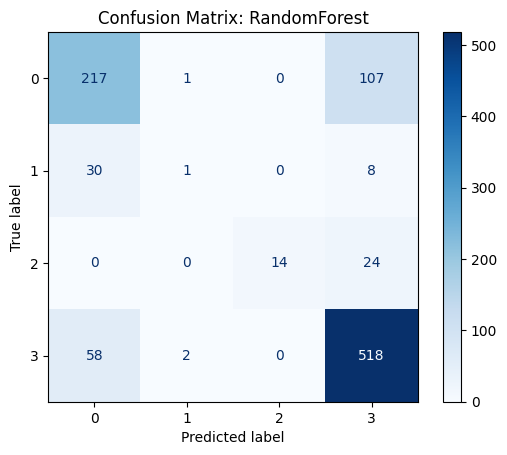

Trailing Decision Tree...
Decision Tree Accuracy: 0.7020408163265306


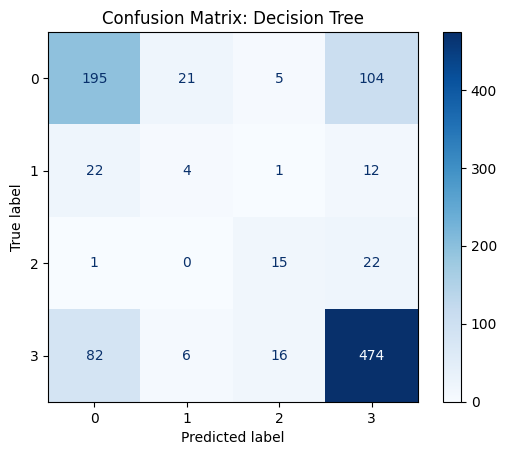

Trailing K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.6316326530612245


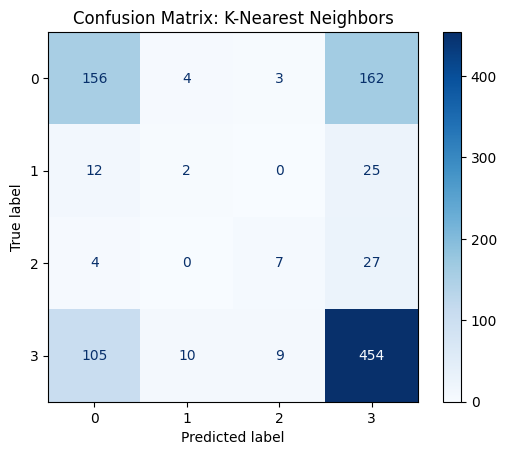

Trailing Naive Bayes...
Naive Bayes Accuracy: 0.6204081632653061


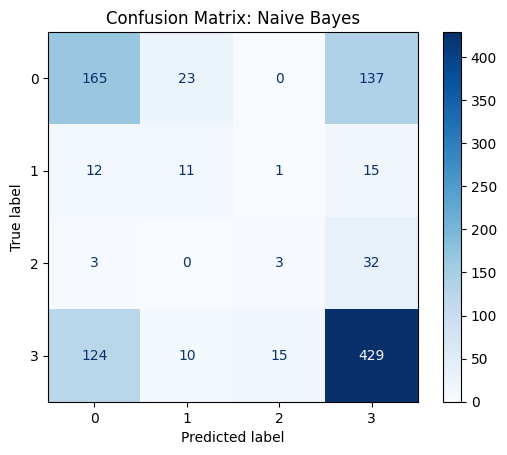

In [22]:
results = {}
for model_name, model in models.items():
  print(f"Trailing {model_name}...")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy
  print(f"{model_name} Accuracy: {accuracy}")

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  disp.plot(cmap="Blues")
  plt.title(f"Confusion Matrix: {model_name}")
  plt.show()

### Optimize model using Randomized Search

In [23]:
# List our parameters
param_grid = {
  "n_estimators": [50, 100, 200],
  "max_depth": [10, 20, 30],
  "min_samples_split": [2, 5, 10],
  "min_samples_leaf": [1, 2, 4],
  "bootstrap": [True, False]
}

# Define our RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=234), param_distributions=param_grid,n_iter=10,cv=5,n_jobs=-1,verbose=1,random_state=42)

random_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {random_search.best_params_}")

# Cross validation score for the best model - Random Forest
Best_model = random_search.best_estimator_
cv_scores = cross_val_score(Best_model, X_scaled, y, cv = 5)
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Cross-validation scores for Random Forest: [0.65612245 0.6622449  0.70306122 0.68845761 0.70786517]
Mean cross-validation score: 0.6835502699547643


## **7. Save Model and Scalar**

In [24]:
joblib.dump(Best_model, "best_model.pkl")

# Let us save the scaler (MinMaxScaler used for the feature scaling)
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler have been saved successfully.")

Model and scaler have been saved successfully.
